# Import some necessary librairies

In [1]:
# Import libraries for data preprocessing
import numpy as np  # Linear Algebra 
import pandas as pd # data processing, CSV file I/O

# Import visualization libraries 
import matplotlib.pyplot as plt # Matlab-style plotting
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

% matplotlib inline  
sns.set_style('whitegrid')

## First we read our data into a pandas dataframe 

In [2]:
# Reading the train and the test datasets 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Now let's start understanding our data

In [3]:
# How many rows and columns we have in each dataset 
print(train.shape)
print('*' * 10)
print(test.shape)

(1460, 81)
**********
(1459, 80)


In [4]:
# let's try to understand our data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Get some information about our data
# As we can see we have null values which we need to deal with 
print(train.info())
print('*' * 30)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Dealing with missing values

### First Identify the missing data 

In [6]:
# Finding null values 
# As our data is large so we better visualize them
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


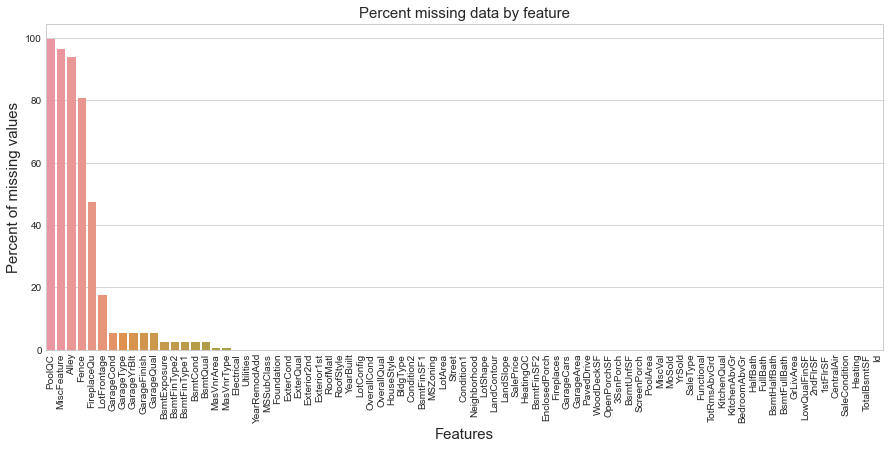

In [7]:
# Calculate percentage of our missing values
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
# As our data is large it's better to visualize the missing values
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

,Total,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270


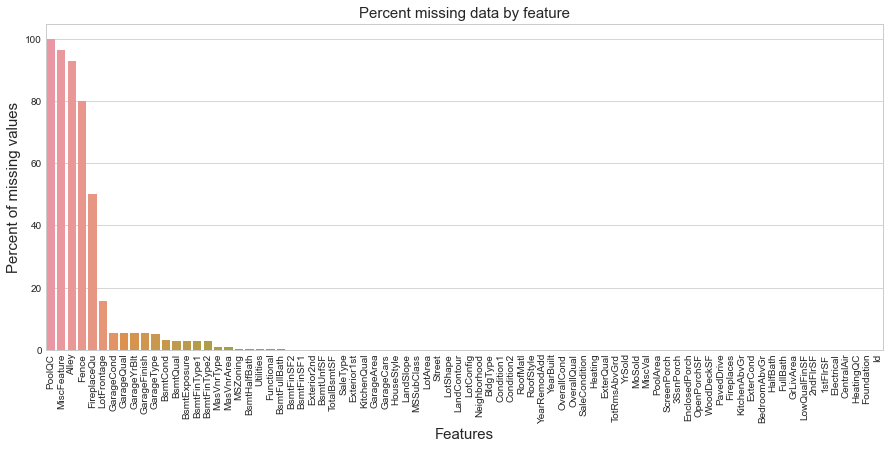

In [8]:
# Same for testing data 
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [9]:
# A common approach is that we drop all columns which their missing values exceeds 60%
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [10]:
# Now let's deal with the rest of the missing data
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

In [11]:
# We need to know the values we have to determine which approach to use when filling the data 
train.LotFrontage.nunique()

110

In [12]:
# My option would be to randomly fill these missing values with values close to the mean but within one standard deviation.
# As our missing data is large so we don't want to fill the data with mean values so now change in the dist happen
LotFrontage_avg = train['LotFrontage'].mean()
LotFrontage_std = train['LotFrontage'].std()
LotFrontage_null_count = train['LotFrontage'].isnull().sum()
LotFrontage_null_random_list = np.random.randint(LotFrontage_avg - LotFrontage_std, LotFrontage_avg + LotFrontage_std, size=LotFrontage_null_count)
train['LotFrontage'][np.isnan(train['LotFrontage'])] = LotFrontage_null_random_list
train['LotFrontage'] = train['LotFrontage'].astype(int)

In [13]:
# Same for Test dataset
LotFrontage_avg = test['LotFrontage'].mean()
LotFrontage_std = test['LotFrontage'].std()
LotFrontage_null_count = test['LotFrontage'].isnull().sum()
LotFrontage_null_random_list = np.random.randint(LotFrontage_avg - LotFrontage_std, LotFrontage_avg + LotFrontage_std, size=LotFrontage_null_count)
test['LotFrontage'][np.isnan(test['LotFrontage'])] = LotFrontage_null_random_list
test['LotFrontage'] = test['LotFrontage'].astype(int)

In [14]:
# Calculating percentage of missing values 
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FireplaceQu,690,47.260274
GarageFinish,81,5.547945
GarageType,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
...,...,...
CentralAir,0,0.000000
HeatingQC,0,0.000000
SaleCondition,0,0.000000
TotalBsmtSF,0,0.000000


In [15]:
# Calculating percentage of missing values 
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FireplaceQu,730,50.034270
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
...,...,...
Electrical,0,0.000000
CentralAir,0,0.000000
HeatingQC,0,0.000000
Heating,0,0.000000


In [16]:
# Before dealing with GarageFinish we need to remember it's data type 
# This will help us determine which way we fill the missing data
train.GarageFinish.dtype

dtype('O')

In [17]:
# What are the values of GarageFinish
train.GarageFinish.value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [18]:
# Trying to find if their is a relation between GarageCars & GarageFinish
# We found that whenever a GarageFinish is null Garage cars == 0
train['GarageCars'][train['GarageFinish'].isnull() == True].head(20)

39     0
48     0
78     0
88     0
89     0
99     0
108    0
125    0
127    0
140    0
148    0
155    0
163    0
165    0
198    0
210    0
241    0
250    0
287    0
291    0
Name: GarageCars, dtype: int64

In [19]:
test['GarageCars'][test['GarageFinish'].isnull() == True].head()

53    0.0
71    0.0
79    0.0
92    0.0
96    0.0
Name: GarageCars, dtype: float64

In [20]:
train['GarageCars'].fillna(value=0, inplace=True)
test['GarageCars'].fillna(value=0, inplace=True)

### So we found out that we can convert  the missing values into a category 
#### We 'll call it Nfn which stands for No Finish 

In [21]:
# Create a new category we will call it Nfn
train['GarageFinish'].fillna(value='Nfn', inplace=True)
test['GarageFinish'].fillna(value='Nfn', inplace=True)

In [22]:
# Now we find all values in GarageType
train.GarageType.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [23]:
test.GarageType.value_counts(dropna=False)

Attchd     853
Detchd     392
BuiltIn     98
NaN         76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [24]:
# Same as above we create a new category called Nogarage
train['GarageType'].fillna(value='Nogarage', inplace=True)
test['GarageType'].fillna(value='Nogarage', inplace=True)

In [25]:
train.GarageCond.value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [26]:
test.GarageCond.value_counts(dropna=False)

TA     1328
NaN      78
Fa       39
Po        7
Gd        6
Ex        1
Name: GarageCond, dtype: int64

In [27]:
train['GarageCond'].fillna(value='NG', inplace=True)
test['GarageCond'].fillna(value='NG', inplace=True)

In [28]:
# Now to see the remaining features and their missing value percentage 
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FireplaceQu,690,47.260274
GarageQual,81,5.547945
GarageYrBlt,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
...,...,...
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000
KitchenQual,0,0.000000


In [29]:
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FireplaceQu,730,50.034270
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
BsmtCond,45,3.084304
BsmtQual,44,3.015764
...,...,...
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
Electrical,0,0.000000
CentralAir,0,0.000000


In [30]:
train.GarageQual.value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64

In [31]:
test.GarageQual.value_counts(dropna=False)

TA     1293
NaN      78
Fa       76
Gd       10
Po        2
Name: GarageQual, dtype: int64

In [32]:
# Filling missing data in both train and test with NG
train['GarageQual'].fillna(value='NG', inplace=True)
test['GarageQual'].fillna(value='NG', inplace=True)

In [33]:
train.GarageYrBlt.nunique(dropna=False)

98

Text(0.5, 1.0, 'Test GarageYrBlt')

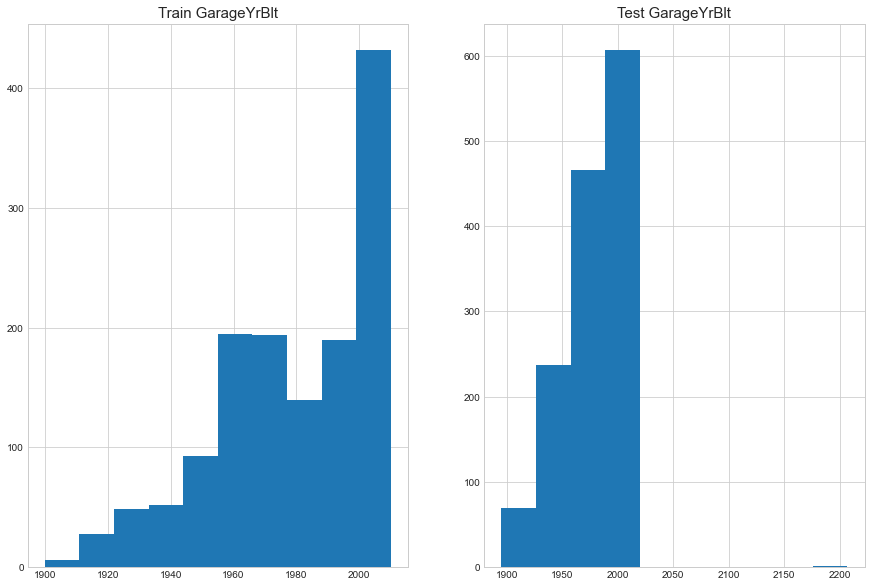

In [34]:
# As we can see in the test GarageYrBlt there are outliers  
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
train.GarageYrBlt.hist(ax=ax[0])
ax[0].set_title('Train GarageYrBlt', fontsize=15)
test.GarageYrBlt.hist(ax=ax[1])
ax[1].set_title('Test GarageYrBlt', fontsize=15)

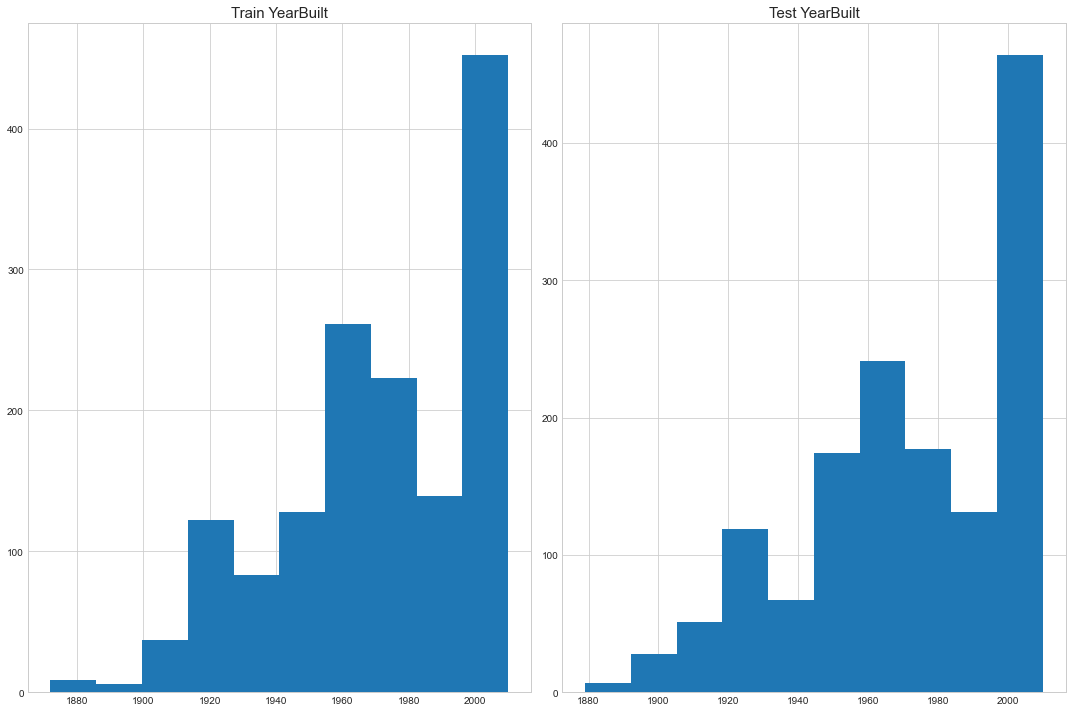

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
train.YearBuilt.hist(ax=ax[0])
test.YearBuilt.hist(ax=ax[1])

ax[0].set_title('Train YearBuilt', fontsize=15)
ax[1].set_title('Test YearBuilt', fontsize=15)
plt.tight_layout()

 By logic the year when the house was built is the same as the garage

In [36]:
# As we can see that they are similar 
train[['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
1455,1999.0,1999
1456,1978.0,1978
1457,1941.0,1941
1458,1950.0,1950


In [37]:
# Also in the test dataset
test[['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
0,1961.0,1961
1,1958.0,1958
2,1997.0,1997
3,1998.0,1998
4,1992.0,1992
...,...,...
1454,NaN,1970
1455,1970.0,1970
1456,1960.0,1960
1457,NaN,1992


In [38]:
# So we can fill the missing values with it's corresponding YearBuilt data
train['YearBuilt'][train.GarageYrBlt.isnull() == True]

39      1955
48      1920
78      1968
88      1915
89      1994
        ... 
1349    1872
1407    1985
1449    1970
1450    1974
1453    2006
Name: YearBuilt, Length: 81, dtype: int64

In [39]:
# Filling the GarageYrBlt missing values with it's corresponding YearBuilt values 
train.GarageYrBlt.fillna(value=train['YearBuilt'][train.GarageYrBlt.isnull() == True], inplace=True)
test.GarageYrBlt.fillna(value=test['YearBuilt'][test.GarageYrBlt.isnull() == True], inplace=True)

In [40]:
# Now let's see the remaining missing values in the train data 
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
FireplaceQu,690,47.260274
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247
MasVnrArea,8,0.547945
MasVnrType,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000


In [41]:
# Now let's see the remaining missing values in the test data 
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
FireplaceQu,730,50.034270
BsmtCond,45,3.084304
BsmtExposure,44,3.015764
BsmtQual,44,3.015764
BsmtFinType2,42,2.878684
BsmtFinType1,42,2.878684
MasVnrType,16,1.096642
MasVnrArea,15,1.028101
MSZoning,4,0.274160
Utilities,2,0.137080


In [42]:
train.BsmtFinType2.nunique(dropna=False)

7

In [43]:
train.BsmtFinType2.value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [44]:
test.BsmtFinType2.value_counts(dropna=False)

Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [45]:
train[['BsmtFinType2', 'BsmtFinSF2']]

,BsmtFinType2,BsmtFinSF2
0,Unf,0
1,Unf,0
2,Unf,0
3,Unf,0
4,Unf,0
...,...,...
1455,Unf,0
1456,Rec,163
1457,Unf,0
1458,Rec,1029


In [46]:
print(train.BsmtFinType2.value_counts(dropna=False))
print('*' * 40)
print(test.BsmtFinType2.value_counts(dropna=False))

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
****************************************
Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64


In [47]:
# Filling the BsmrFinType2 with it's mode
train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0], inplace=True)
test.BsmtFinType2.fillna(test.BsmtFinType2.mode()[0], inplace=True)

In [48]:
train['BsmtFinSF1'][train.BsmtFinType1.isnull() == True].head(8)

17     0
39     0
90     0
102    0
156    0
182    0
259    0
342    0
Name: BsmtFinSF1, dtype: int64

In [49]:
print(train.BsmtFinType1.value_counts(dropna=False))
print('*' * 40)
print(test.BsmtFinType1.value_counts(dropna=False))

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
****************************************
GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64


In [50]:
train.BsmtFinType1.mode()

0    Unf
dtype: object

In [51]:
# Same as before we will fill the missing data with the mode
train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0], inplace=True)
test.BsmtFinType1.fillna(test.BsmtFinType1.mode()[0], inplace=True)

In [52]:
# We now understand that all basement features depend on each other 
# So fill the rest with their mode
train.BsmtExposure.fillna(value=train.BsmtExposure.mode()[0], inplace=True) 
train.BsmtQual.fillna(value=train.BsmtQual.mode()[0], inplace=True) 
train.BsmtCond.fillna(value=train.BsmtCond.mode()[0], inplace=True)

# Same as for testing data
test.BsmtExposure.fillna(value=test.BsmtExposure.mode()[0], inplace=True) 
test.BsmtQual.fillna(value=test.BsmtQual.mode()[0], inplace=True) 
test.BsmtCond.fillna(value=test.BsmtCond.mode()[0], inplace=True)

In [53]:
# Now let's see what is still missing  
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
FireplaceQu,690,47.260274
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000


In [54]:
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
FireplaceQu,730,50.034270
MasVnrType,16,1.096642
MasVnrArea,15,1.028101
MSZoning,4,0.274160
Functional,2,0.137080


In [55]:
train.FireplaceQu.nunique(dropna=False)

6

In [56]:
# What are the values for FireplaceQu feature
print(train.FireplaceQu.value_counts(dropna=False))
print('*' * 40)
print(test.FireplaceQu.value_counts(dropna=False))

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
****************************************
NaN    730
Gd     364
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64


In [57]:
# As we can see here the FireplaceQu values are missing when Fireplaces value is equal to 0
train[['Fireplaces', 'FireplaceQu']].head(20)

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
5,0,NaN
6,1,Gd
7,2,TA
8,2,TA
9,2,TA


In [58]:
# Filling the missing data with NG which we created 
train['FireplaceQu'].fillna(value='NG', inplace=True)
test['FireplaceQu'].fillna(value='NG', inplace=True)

In [59]:
# What are the values of MasVnrType
train.MasVnrType.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [60]:
# What are the values of MasVnrArea
train.MasVnrArea.value_counts(dropna=False).head(20)

0.0      861
72.0       8
180.0      8
NaN        8
108.0      8
120.0      7
16.0       7
106.0      6
80.0       6
340.0      6
200.0      6
132.0      5
170.0      5
360.0      5
84.0       5
320.0      5
270.0      4
183.0      4
100.0      4
168.0      4
Name: MasVnrArea, dtype: int64

In [61]:
# We need to find the relation between MasVnrType & MasVnrArea
# As there are null values in both of them we can't get any information like the others before 
train['MasVnrType'][train['MasVnrArea'].isnull() == True]

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [62]:
# Drop the remaining missing rows 
train.dropna(inplace=True)
test.dropna(inplace=True)

In [63]:
# Now let's see our data if we missed anything by accident   
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [64]:
# As we can see we finished cleaning the training dataset but the testing still needs a little bit more cleaning
# Now let's see our data if we missed anything by accident   
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/test.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SaleCondition,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [65]:
(train.shape, test.shape)

((1451, 77), (1431, 76))

# Time for some EDA (Exploratory Data Analysis)

Using pearson correlation heatmap won't be useful as the data is large

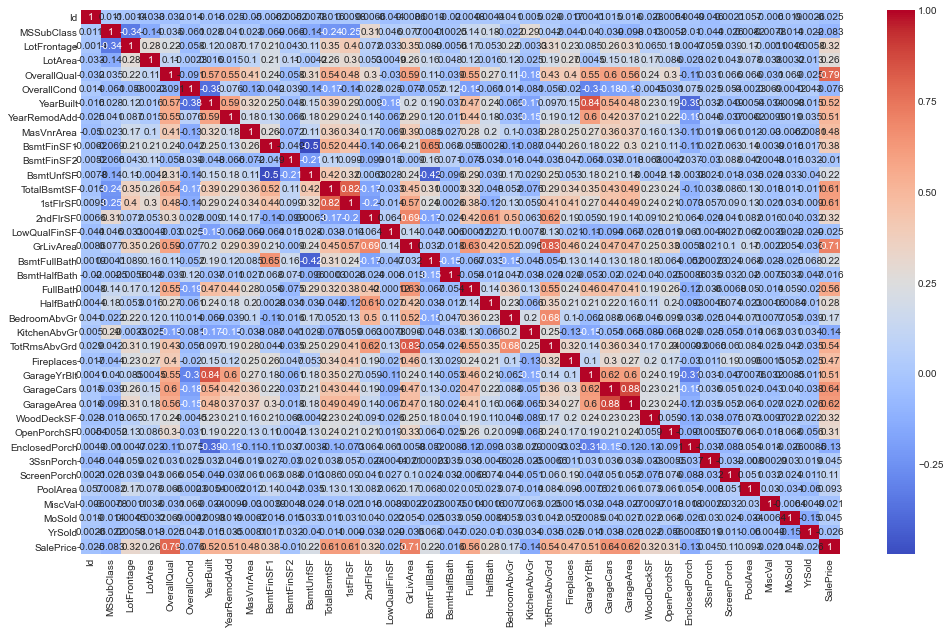

In [66]:
# Using correlation heatmap
plt.figure(figsize=(17, 10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [67]:
train.corr()['SalePrice'].sort_values(ascending=False)[:11]

SalePrice       1.000000
OverallQual     0.790085
GrLivArea       0.710073
GarageCars      0.639749
GarageArea      0.622484
TotalBsmtSF     0.613299
1stFlrSF        0.606969
FullBath        0.562710
TotRmsAbvGrd    0.536366
YearBuilt       0.523274
GarageYrBlt     0.508230
Name: SalePrice, dtype: float64

In [68]:
train.OverallQual.value_counts(dropna=False)

5     396
6     372
7     315
8     167
4     116
9      43
3      20
10     17
2       3
1       2
Name: OverallQual, dtype: int64

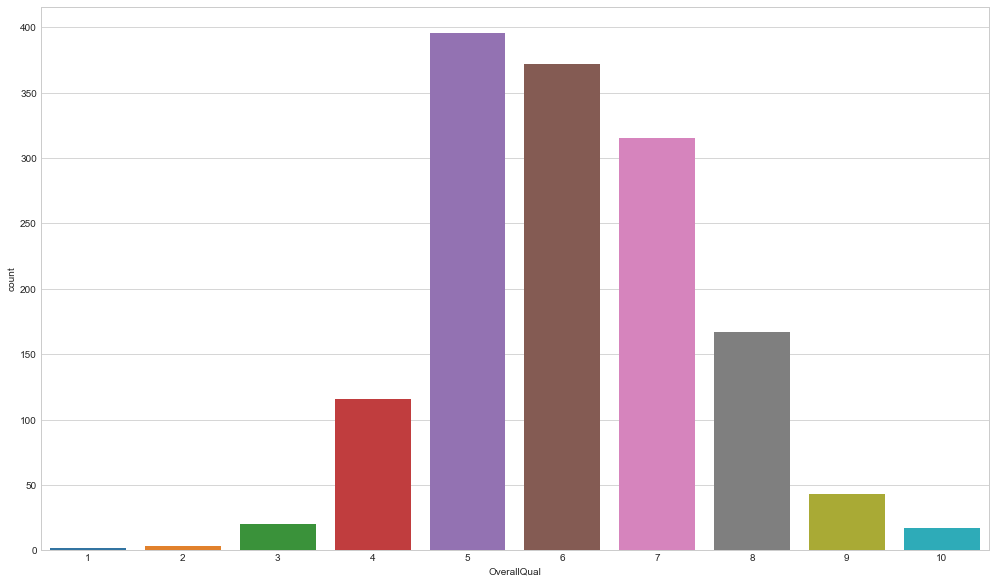

In [69]:
plt.figure(figsize=(17, 10))
sns.countplot(x='OverallQual', data=train)

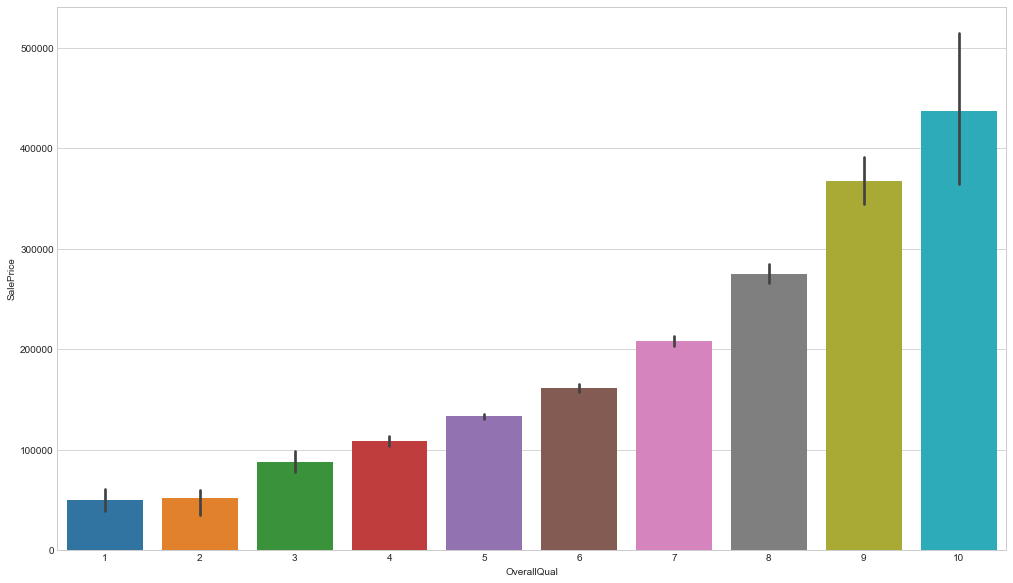

In [70]:
plt.figure(figsize=(17, 10))
sns.barplot(x='OverallQual', y='SalePrice', data=train)

In [71]:
train.GrLivArea.nunique(dropna=False)

858

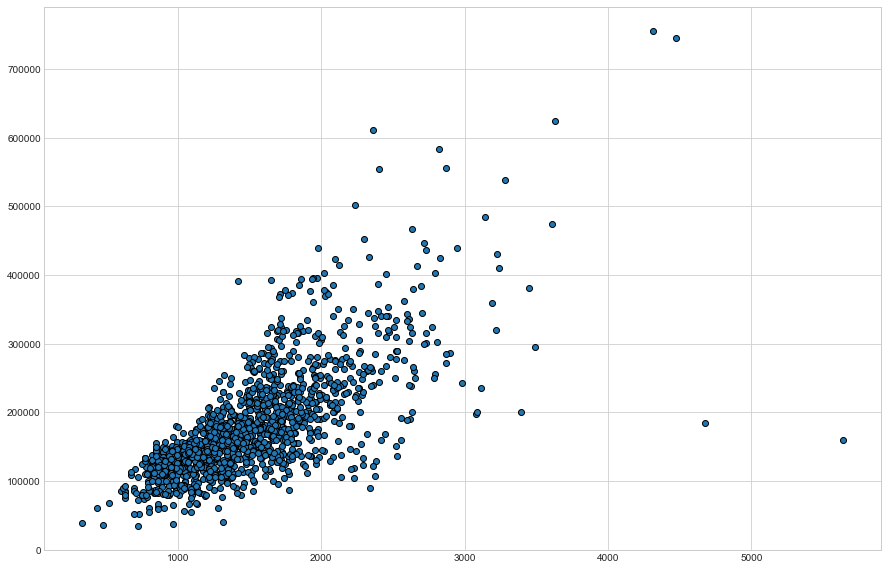

In [72]:
plt.figure(figsize=(15, 10))
plt.scatter(x=train.GrLivArea, y=train.SalePrice, edgecolors="black")

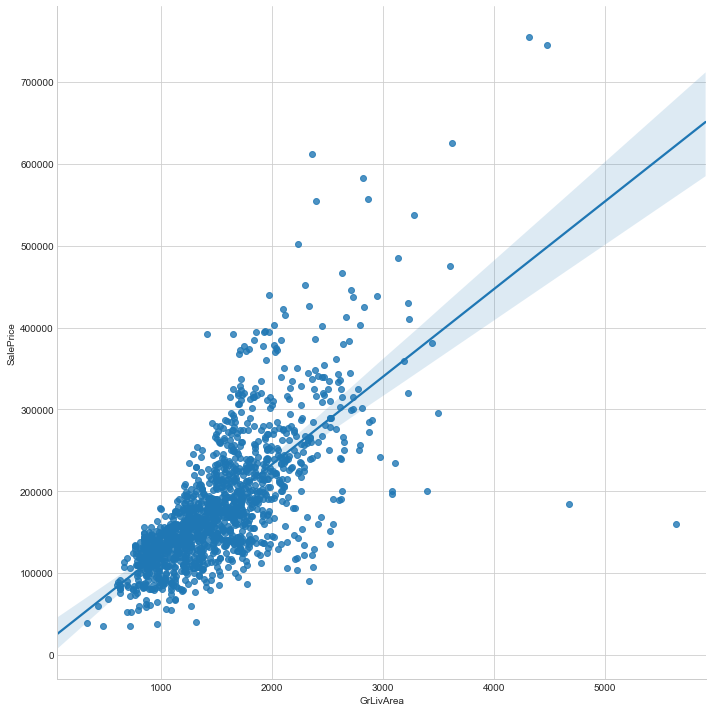

In [73]:
sns.lmplot(x='GrLivArea', y='SalePrice',data=train, size=10)

In [74]:
train.GarageCars.nunique(dropna=False)

5

In [75]:
train.GarageCars.value_counts(dropna=False)

2    816
1    369
3    180
0     81
4      5
Name: GarageCars, dtype: int64

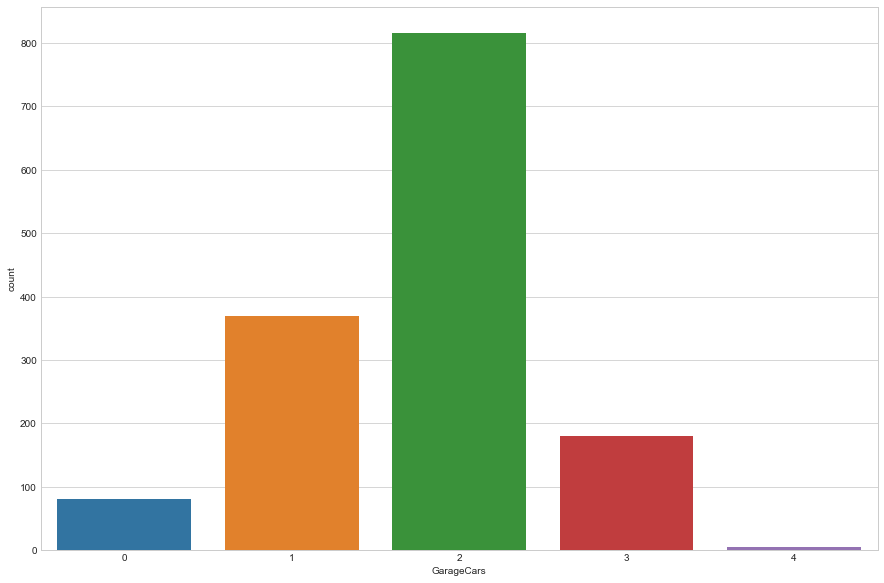

In [76]:
plt.figure(figsize=(15, 10))
sns.countplot(x='GarageCars', data=train)

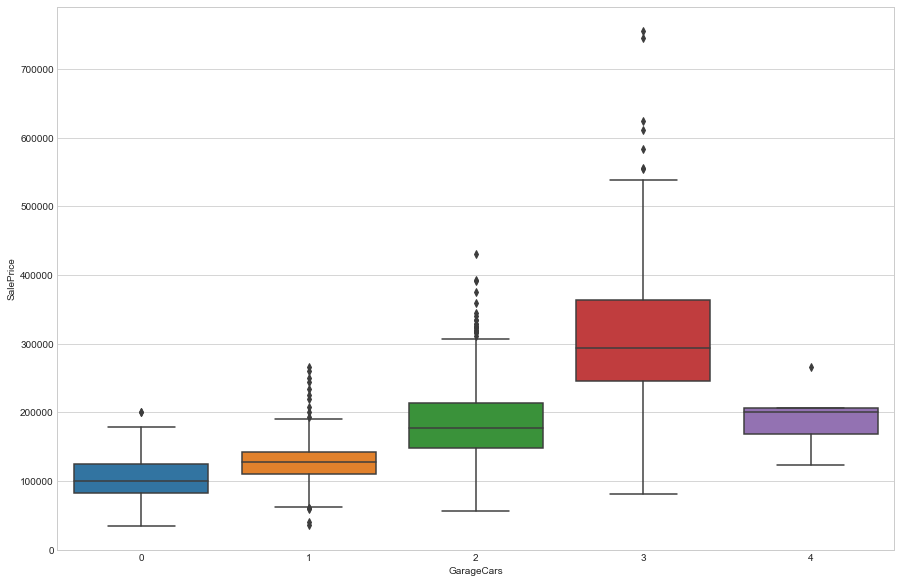

In [77]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='GarageCars', y='SalePrice', data=train)

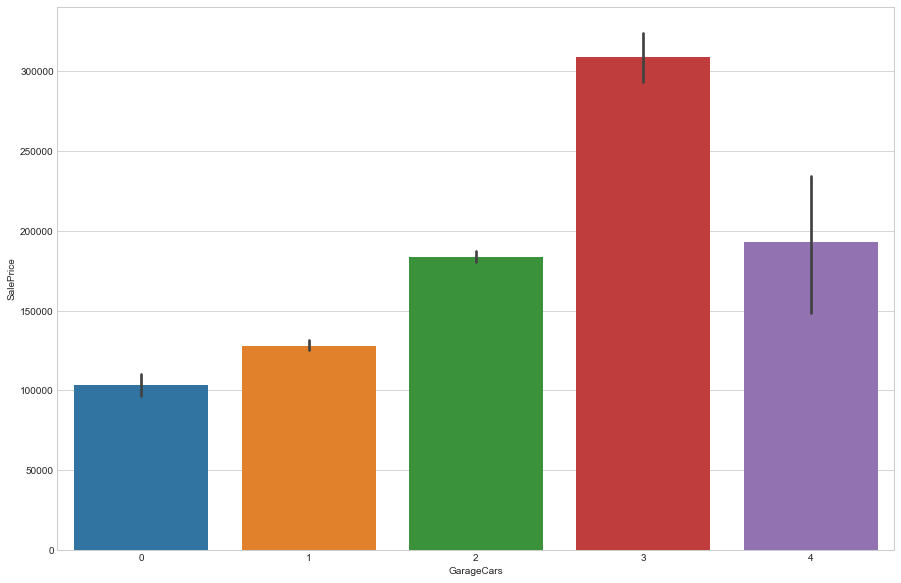

In [78]:
plt.figure(figsize=(15, 10))
sns.barplot(x='GarageCars', y='SalePrice', data=train)

In [79]:
train.GarageArea.nunique()

438

In [80]:
columns = ['MSZoning', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [81]:
final_df = pd.concat([train, test], axis=0)

In [82]:
final_df.shape

(2882, 77)

In [83]:
def One_hot_encoding(columns):
    df_final=final_df
    i=0
    for fields in columns:
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:           
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [84]:
final_df = One_hot_encoding(columns)

In [85]:
final_df.shape

(2882, 243)

In [86]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [87]:
final_df.shape

(2882, 181)

In [88]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [89]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [90]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Using GradientBoosting with RandomizedSearch 

In [91]:
num_estimators = [500,1000]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='huber'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000]},
                   random_state=1)

In [92]:
# Best params
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_depth': 2,
 'learning_rate': 0.05}

In [93]:
# Train the model 
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='huber'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [500, 1000]},
                   random_state=1)

In [94]:
# Accuracy for training data
gboost_score=random_search.score(X_train,y_train)
print(f'{round(gboost_score * 100, 2)}%')

94.0%


In [95]:
# Predictions
pred = random_search.predict(df_Test)

In [96]:
pred

array([135210.6918336 , 107131.03143189, 188288.81808673, ...,
       177602.41723404, 121317.96065743, 236318.01482576])

In [97]:
pred_df=pd.DataFrame(pred)
sample = pd.read_csv('sample_submission.csv')
data= pd.concat([sample['Id'],pred_df], axis=1)
data.columns=['Id','SalePrice']
data.to_csv('sample_submission1.csv',index=False)

In [98]:
data.head()

,Id,SalePrice
0,1461.0,135210.691834
1,1462.0,107131.031432
2,1463.0,188288.818087
3,1464.0,163617.013830
4,1465.0,177952.727441
